# Problem Statement: Rent Price Prediction Model

In an increasingly digitalized world, consumers rely heavily on laptops for work, education, entertainment, and communication. However, the market for laptops is vast and varied, with a multitude of brands, models, and configurations available, each accompanied by different price points. For consumers, accurately assessing the fair market value of a laptop can be challenging, leading to potential overpayment or missed opportunities for cost-effective purchases.

The aim of this project is to develop a robust laptop price detection system that can analyze various features of a laptop and predict its market value accurately. By leveraging machine learning algorithms and data analysis techniques, this system will provide users with real-time insights into the fair market price of a laptop based on its specifications, brand, Storage, RAM and other relevant factors.

### Importing the necessary Libraries

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset
Dataset Summary: Laptop_price_csv

Dataset Description:

The dataset comprises information on 1303 laptops, with each entry containing various attributes that describe the specifications and pricing of different laptop models. The dataset includes the following columns:

Company: This column represents the brand or manufacturer of the laptop, providing insight into the diversity of brands available in the market.

Product: This column contains the model name or designation of each laptop, distinguishing between different versions or configurations within a brand.

TypeName: This attribute categorizes laptops into different types or categories based on their intended use or design features, such as ultrabooks, gaming laptops, 2-in-1 convertibles, etc.

Inches: This numerical attribute denotes the size of the laptop's display screen in inches, offering insight into the form factor and visual experience of each model.

ScreenResolution: This column specifies the resolution and display technology of the laptop's screen, providing information about the clarity and visual quality of the display.

Cpu: This attribute describes the central processing unit (CPU) of the laptop, including details such as the manufacturer, model, and specifications of the processor.

Ram: This column indicates the amount of random access memory (RAM) installed in each laptop, which affects its multitasking capabilities and overall performance.

Memory: This attribute provides information about the storage capacity and type of storage device (e.g., HDD, SSD) present in the laptop, influencing its storage capabilities and data access speeds.

Gpu: This column describes the graphics processing unit (GPU) of the laptop, including details about the manufacturer, model, and specifications of the graphics card.

OpSys: This attribute represents the operating system (OS) installed on each laptop, such as Windows, macOS, Linux, etc., which can affect software compatibility and user experience.

Weight: This numerical attribute specifies the weight of the laptop in kilograms, offering insights into its portability and mobility.

Price_euros: This column contains the price of each laptop in euros, serving as the target variable for price prediction tasks.

The dataset encompasses a diverse range of laptops from various brands, with attributes covering key specifications, pricing information, and other relevant details necessary for analyzing and understanding the laptop market.

In [137]:
df = pd.read_csv('laptop_price.csv',encoding='ISO-8859-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### Basic Information about the Dataset

In [138]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [140]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [141]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

#### Observation
* There are no null values present in the dataset.
* Feature Engineering has to be performed on many columns.
* Price Feature has to be converted to INR.
* Some Features need to be dropped.
* Features like ScreenResolution, CPU, Memory, GPU has to be standardised

### Dropping unwanted columns

In [142]:
df = df.drop(columns=['laptop_ID','Product'])

#### Cleaning and Formatting 'Typename' feature

In [143]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [144]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

#### Replacing '2 in 1 Convertible' with 'Hybrid'

In [145]:
df[df['TypeName']=='2 in 1 Convertible']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
23,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62kg,819.0
44,Dell,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,12GB,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77kg,999.0
50,Lenovo,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Android,0.69kg,319.0
95,Acer,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.5kg,847.0
112,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.37kg,1399.0
...,...,...,...,...,...,...,...,...,...,...,...
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1284,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1285,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0


In [146]:
df['TypeName'] = df['TypeName'].str.replace('2 in 1 Convertible','Hybrid')

In [147]:
df['TypeName'].value_counts()

Notebook       727
Gaming         205
Ultrabook      196
Hybrid         121
Workstation     29
Netbook         25
Name: TypeName, dtype: int64

#### Cleaning and Formatting 'Inches' Feature

In [148]:
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [149]:
df['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

In [150]:
df['Inches'] = df['Inches'].round(0)
df['Inches'] = df['Inches'].astype(int)
df['screen_size'] = df['Inches']
df.drop(columns='Inches',inplace=True)

In [151]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,screen_size
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,13
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,13
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,16
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,15
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,13


#### Cleaning and Formatting 'RAM' Feature

In [152]:
df['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [153]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [154]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Ram'] = df['Ram'].astype(int)
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,screen_size
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,13
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,13
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,16
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,15
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,13


#### Cleaning and Formatting 'OpSys' Feature

In [155]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [156]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [157]:
df['OpSys'] = df['OpSys'].replace({'Windows 7':'Windows','Windows 10 S':'Windows','Windows 10':'Windows','macOS':'Mac','Mac OS X':'Mac'})

In [158]:
df['OpSys'] = df['OpSys'].replace('No OS','Other')

In [159]:
df['OpSys'].value_counts()

Windows      1125
Other          66
Linux          62
Chrome OS      27
Mac            21
Android         2
Name: OpSys, dtype: int64

#### Cleaning and Formatting 'Price_euros' Feature
* We will convert the feature that is in euros to INR 
As of today 5/11/2024 1 euro = 90.13

In [160]:
df['Price'] = df['Price_euros'] * 88.8 #Euro to INR current rate
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,screen_size,Price
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37kg,1339.69,13,118964.472
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34kg,898.94,13,79825.872
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Other,1.86kg,575.00,16,51060.000
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac,1.83kg,2537.45,15,225325.560
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac,1.37kg,1803.60,13,160159.680


In [161]:
df.drop(columns='Price_euros',inplace=True)

#### Cleaning and Formatting 'Weight' feature

In [162]:
df['Weight'].value_counts()

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: Weight, Length: 179, dtype: int64

In [163]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [164]:
df['Weight'] = df['Weight'].astype(float)

In [165]:
df.describe()

,Ram,Weight,screen_size,Price
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,8.382195,2.038734,15.140445,99783.404850
std,5.084665,0.665475,1.529359,62072.002977
min,2.000000,0.690000,10.000000,15451.200000
25%,4.000000,1.500000,14.000000,53191.200000
50%,8.000000,2.040000,16.000000,86757.600000
75%,8.000000,2.300000,16.000000,132123.744000
max,64.000000,4.700000,18.000000,541591.200000


#### Cleaning and Formatting 'Memory' feature

In [166]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [167]:
split_memory  = df['Memory'].str.split(' ',expand=True)
max_splits = split_memory.shape[1]
new_columns = [f'memory{i+1}' for i in range(max_splits)]
df[new_columns[:split_memory.shape[1]]] = split_memory
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,screen_size,Price,memory1,memory2,memory3,memory4,memory5,memory6,memory7
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37,13,118964.472,128GB,SSD,None,None,None,None,None
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34,13,79825.872,128GB,Flash,Storage,None,None,None,None
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Other,1.86,16,51060.000,256GB,SSD,None,None,None,None,None
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac,1.83,15,225325.560,512GB,SSD,None,None,None,None,None
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac,1.37,13,160159.680,256GB,SSD,None,None,None,None,None


In [168]:
df.drop(columns=['memory3','memory4','memory5','memory6','memory7'],inplace=True)
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,screen_size,Price,memory1,memory2
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37,13,118964.472,128GB,SSD
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34,13,79825.872,128GB,Flash
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Other,1.86,16,51060.000,256GB,SSD
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac,1.83,15,225325.560,512GB,SSD
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac,1.37,13,160159.680,256GB,SSD


In [169]:
df['Memory_size'] = df['memory1']
df['Memory_type'] = df['memory2']
df.head()
df['Memory_size'] = df['Memory_size'].str.replace('.','')

C:\Users\Admin\AppData\Local\Temp\ipykernel_1268\3033496348.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Memory_size'] = df['Memory_size'].str.replace('.','')


In [170]:
df.drop(columns=['memory1','memory2'],inplace=True)
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,screen_size,Price,Memory_size,Memory_type
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37,13,118964.472,128GB,SSD
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34,13,79825.872,128GB,Flash
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Other,1.86,16,51060.000,256GB,SSD
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac,1.83,15,225325.560,512GB,SSD
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac,1.37,13,160159.680,256GB,SSD


In [171]:
df.drop(columns=['Memory'],inplace=True)

#### Cleaning and Formatting 'CPU' feature

In [172]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [173]:
split_text = df['Cpu'].str.split(' ', expand=True)

In [174]:
df['first_word'] = split_text[0]
df['next_three_words'] = split_text[[1, 2, 3]].apply(lambda x: ' '.join(x.dropna()), axis=1)

In [175]:
df['processor_company'] = df['first_word']
df['processor_type'] = df['next_three_words']
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,screen_size,Price,Memory_size,Memory_type,first_word,next_three_words,processor_company,processor_type
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,Mac,1.37,13,118964.472,128GB,SSD,Intel,Core i5 2.3GHz,Intel,Core i5 2.3GHz
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,Mac,1.34,13,79825.872,128GB,Flash,Intel,Core i5 1.8GHz,Intel,Core i5 1.8GHz
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,Other,1.86,16,51060.000,256GB,SSD,Intel,Core i5 7200U,Intel,Core i5 7200U
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,Mac,1.83,15,225325.560,512GB,SSD,Intel,Core i7 2.7GHz,Intel,Core i7 2.7GHz
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,Mac,1.37,13,160159.680,256GB,SSD,Intel,Core i5 3.1GHz,Intel,Core i5 3.1GHz


In [176]:
df.drop(columns=['first_word','next_three_words'], inplace=True)
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,screen_size,Price,Memory_size,Memory_type,processor_company,processor_type
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,Mac,1.37,13,118964.472,128GB,SSD,Intel,Core i5 2.3GHz
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,Mac,1.34,13,79825.872,128GB,Flash,Intel,Core i5 1.8GHz
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,Other,1.86,16,51060.000,256GB,SSD,Intel,Core i5 7200U
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,Mac,1.83,15,225325.560,512GB,SSD,Intel,Core i7 2.7GHz
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,Mac,1.37,13,160159.680,256GB,SSD,Intel,Core i5 3.1GHz


In [177]:
df.drop(columns=['Cpu'], inplace=True)
df.head()

,Company,TypeName,ScreenResolution,Ram,Gpu,OpSys,Weight,screen_size,Price,Memory_size,Memory_type,processor_company,processor_type
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,Mac,1.37,13,118964.472,128GB,SSD,Intel,Core i5 2.3GHz
1,Apple,Ultrabook,1440x900,8,Intel HD Graphics 6000,Mac,1.34,13,79825.872,128GB,Flash,Intel,Core i5 1.8GHz
2,HP,Notebook,Full HD 1920x1080,8,Intel HD Graphics 620,Other,1.86,16,51060.000,256GB,SSD,Intel,Core i5 7200U
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,Mac,1.83,15,225325.560,512GB,SSD,Intel,Core i7 2.7GHz
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,Mac,1.37,13,160159.680,256GB,SSD,Intel,Core i5 3.1GHz


In [178]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [179]:
df['resolution'] = df['ScreenResolution'].str.split().str[-1]
df.head()

,Company,TypeName,ScreenResolution,Ram,Gpu,OpSys,Weight,screen_size,Price,Memory_size,Memory_type,processor_company,processor_type,resolution
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,Mac,1.37,13,118964.472,128GB,SSD,Intel,Core i5 2.3GHz,2560x1600
1,Apple,Ultrabook,1440x900,8,Intel HD Graphics 6000,Mac,1.34,13,79825.872,128GB,Flash,Intel,Core i5 1.8GHz,1440x900
2,HP,Notebook,Full HD 1920x1080,8,Intel HD Graphics 620,Other,1.86,16,51060.000,256GB,SSD,Intel,Core i5 7200U,1920x1080
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,AMD Radeon Pro 455,Mac,1.83,15,225325.560,512GB,SSD,Intel,Core i7 2.7GHz,2880x1800
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 650,Mac,1.37,13,160159.680,256GB,SSD,Intel,Core i5 3.1GHz,2560x1600


In [180]:
df.drop(columns='ScreenResolution',inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,screen_size,Price,Memory_size,Memory_type,processor_company,processor_type,resolution
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,Mac,1.37,13,118964.472,128GB,SSD,Intel,Core i5 2.3GHz,2560x1600
1,Apple,Ultrabook,8,Intel HD Graphics 6000,Mac,1.34,13,79825.872,128GB,Flash,Intel,Core i5 1.8GHz,1440x900
2,HP,Notebook,8,Intel HD Graphics 620,Other,1.86,16,51060.000,256GB,SSD,Intel,Core i5 7200U,1920x1080
3,Apple,Ultrabook,16,AMD Radeon Pro 455,Mac,1.83,15,225325.560,512GB,SSD,Intel,Core i7 2.7GHz,2880x1800
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,Mac,1.37,13,160159.680,256GB,SSD,Intel,Core i5 3.1GHz,2560x1600


#### Cleaning and Formatting the 'GPU' feature

In [181]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [182]:
split_text = df['Gpu'].str.split(' ', expand=True)

In [183]:
df['Gpu_company'] = split_text[0]
df['Graphic_type'] = split_text[[1, 2, 3]].apply(lambda x: ' '.join(x.dropna()), axis=1)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,screen_size,Price,Memory_size,Memory_type,processor_company,processor_type,resolution,Gpu_company,Graphic_type
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,Mac,1.37,13,118964.472,128GB,SSD,Intel,Core i5 2.3GHz,2560x1600,Intel,Iris Plus Graphics
1,Apple,Ultrabook,8,Intel HD Graphics 6000,Mac,1.34,13,79825.872,128GB,Flash,Intel,Core i5 1.8GHz,1440x900,Intel,HD Graphics 6000
2,HP,Notebook,8,Intel HD Graphics 620,Other,1.86,16,51060.000,256GB,SSD,Intel,Core i5 7200U,1920x1080,Intel,HD Graphics 620
3,Apple,Ultrabook,16,AMD Radeon Pro 455,Mac,1.83,15,225325.560,512GB,SSD,Intel,Core i7 2.7GHz,2880x1800,AMD,Radeon Pro 455
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,Mac,1.37,13,160159.680,256GB,SSD,Intel,Core i5 3.1GHz,2560x1600,Intel,Iris Plus Graphics


In [184]:
df['Gpu_company'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [185]:
df['Gpu_company'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_company, dtype: int64

In [186]:
df[df['Gpu_company'] == 'ARM']

,Company,TypeName,Ram,Gpu,OpSys,Weight,screen_size,Price,Memory_size,Memory_type,processor_company,processor_type,resolution,Gpu_company,Graphic_type
1191,Samsung,Hybrid,4,ARM Mali T860 MP4,Chrome OS,1.15,12,58519.2,32GB,Flash,Samsung,Cortex A72&A53 2.0GHz,2400x1600,ARM,Mali T860 MP4


In [187]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,screen_size,Price,Memory_size,Memory_type,processor_company,processor_type,resolution,Gpu_company,Graphic_type
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,Mac,1.37,13,118964.472,128GB,SSD,Intel,Core i5 2.3GHz,2560x1600,Intel,Iris Plus Graphics
1,Apple,Ultrabook,8,Intel HD Graphics 6000,Mac,1.34,13,79825.872,128GB,Flash,Intel,Core i5 1.8GHz,1440x900,Intel,HD Graphics 6000
2,HP,Notebook,8,Intel HD Graphics 620,Other,1.86,16,51060.000,256GB,SSD,Intel,Core i5 7200U,1920x1080,Intel,HD Graphics 620
3,Apple,Ultrabook,16,AMD Radeon Pro 455,Mac,1.83,15,225325.560,512GB,SSD,Intel,Core i7 2.7GHz,2880x1800,AMD,Radeon Pro 455
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,Mac,1.37,13,160159.680,256GB,SSD,Intel,Core i5 3.1GHz,2560x1600,Intel,Iris Plus Graphics


In [188]:
df.drop(columns='Gpu',inplace=True)
df.head(3)

,Company,TypeName,Ram,OpSys,Weight,screen_size,Price,Memory_size,Memory_type,processor_company,processor_type,resolution,Gpu_company,Graphic_type
0,Apple,Ultrabook,8,Mac,1.37,13,118964.472,128GB,SSD,Intel,Core i5 2.3GHz,2560x1600,Intel,Iris Plus Graphics
1,Apple,Ultrabook,8,Mac,1.34,13,79825.872,128GB,Flash,Intel,Core i5 1.8GHz,1440x900,Intel,HD Graphics 6000
2,HP,Notebook,8,Other,1.86,16,51060.000,256GB,SSD,Intel,Core i5 7200U,1920x1080,Intel,HD Graphics 620


In [189]:
df['Memory_size'] = df['Memory_size'].str.replace('GB','')
df.head(3)

,Company,TypeName,Ram,OpSys,Weight,screen_size,Price,Memory_size,Memory_type,processor_company,processor_type,resolution,Gpu_company,Graphic_type
0,Apple,Ultrabook,8,Mac,1.37,13,118964.472,128,SSD,Intel,Core i5 2.3GHz,2560x1600,Intel,Iris Plus Graphics
1,Apple,Ultrabook,8,Mac,1.34,13,79825.872,128,Flash,Intel,Core i5 1.8GHz,1440x900,Intel,HD Graphics 6000
2,HP,Notebook,8,Other,1.86,16,51060.000,256,SSD,Intel,Core i5 7200U,1920x1080,Intel,HD Graphics 620


#### EDA

In [190]:
bob = df.groupby('Company')['Price'].sum().reset_index()
top_10_bob = bob.sort_values(by='Price',ascending=False).head(10)
bob

,Company,Price
0,Acer,5.732742e+06
1,Apple,2.916917e+06
2,Asus,1.549194e+07
3,Chuwi,8.372863e+04
4,Dell,3.128091e+07
5,Fujitsu,1.942056e+05
6,Google,4.469304e+05
7,HP,2.598024e+07
8,Huawei,2.529024e+05
9,LG,5.591736e+05


<Axes: xlabel='Company', ylabel='Price'>

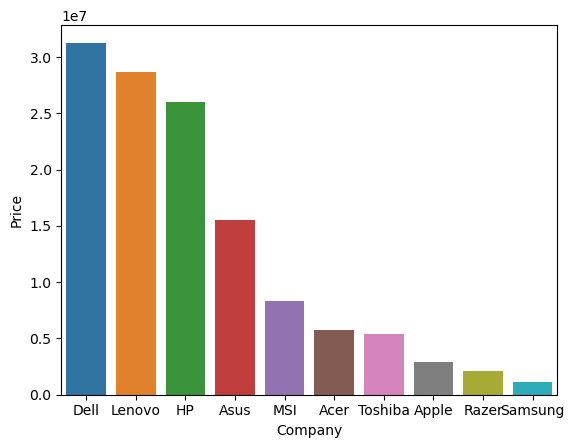

In [191]:
sns.barplot(data=top_10_bob,x='Company',y='Price')

<Axes: xlabel='Price', ylabel='Count'>

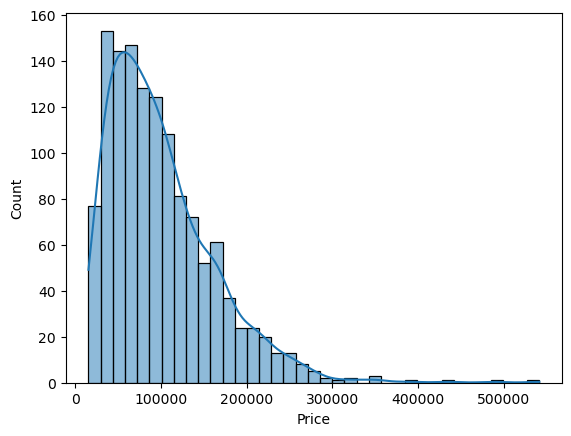

In [192]:
sns.histplot(df['Price'],kde=True)

In [193]:
price_processor_company = df.groupby('processor_company')['Price'].sum().reset_index()
price_processor_company


,processor_company,Price
0,AMD,3.086653e+06
1,Intel,1.268726e+08
2,Samsung,5.851920e+04


<Axes: xlabel='processor_company', ylabel='Price'>

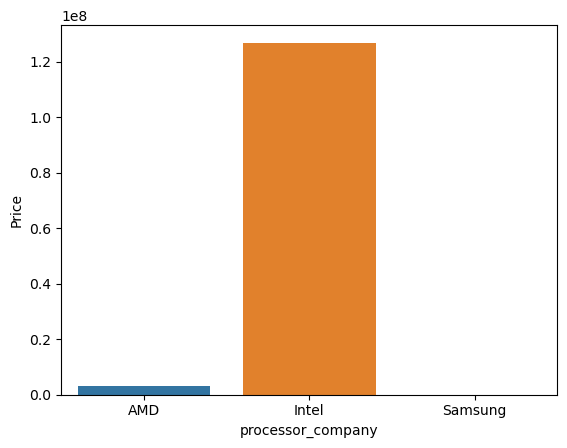

In [194]:
sns.barplot(data=price_processor_company, x='processor_company',y='Price')


<Axes: xlabel='processor_company', ylabel='count'>

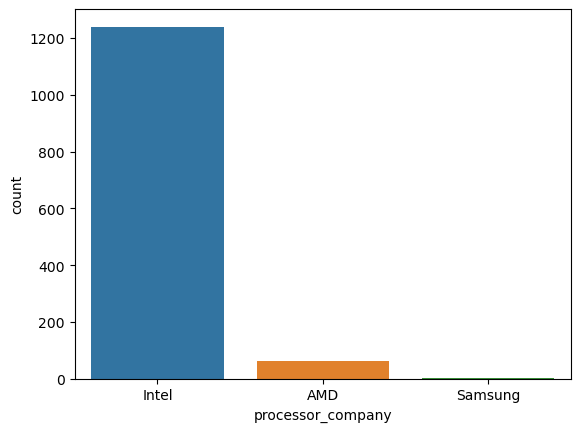

In [195]:
sns.countplot(data=df,x='processor_company')

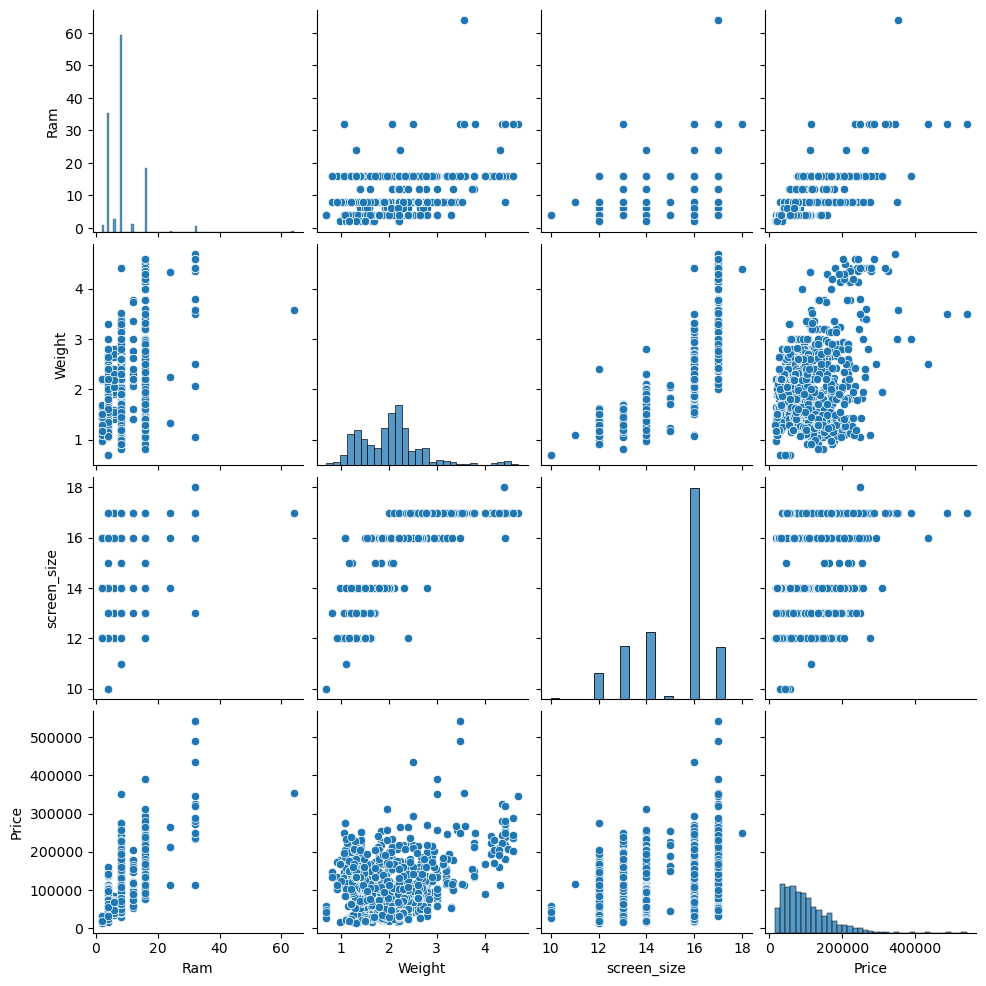

In [196]:
sns.pairplot(df)

### Handling Categorical values and transforming it for ML algorithm

In [197]:
string=[]
number=[]

for i in df.columns:
    if df[i].dtype == 'object':
        string.append(i)
    else:
        number.append(i)
        
print(string)
print(number)


['Company', 'TypeName', 'OpSys', 'Memory_size', 'Memory_type', 'processor_company', 'processor_type', 'resolution', 'Gpu_company', 'Graphic_type']
['Ram', 'Weight', 'screen_size', 'Price']


In [198]:
df['Memory_size'] = df['Memory_size'].str.replace('TB','000')
df

,Company,TypeName,Ram,OpSys,Weight,screen_size,Price,Memory_size,Memory_type,processor_company,processor_type,resolution,Gpu_company,Graphic_type
0,Apple,Ultrabook,8,Mac,1.37,13,118964.472,128,SSD,Intel,Core i5 2.3GHz,2560x1600,Intel,Iris Plus Graphics
1,Apple,Ultrabook,8,Mac,1.34,13,79825.872,128,Flash,Intel,Core i5 1.8GHz,1440x900,Intel,HD Graphics 6000
2,HP,Notebook,8,Other,1.86,16,51060.000,256,SSD,Intel,Core i5 7200U,1920x1080,Intel,HD Graphics 620
3,Apple,Ultrabook,16,Mac,1.83,15,225325.560,512,SSD,Intel,Core i7 2.7GHz,2880x1800,AMD,Radeon Pro 455
4,Apple,Ultrabook,8,Mac,1.37,13,160159.680,256,SSD,Intel,Core i5 3.1GHz,2560x1600,Intel,Iris Plus Graphics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Hybrid,4,Windows,1.80,14,56654.400,128,SSD,Intel,Core i7 6500U,1920x1080,Intel,HD Graphics 520
1299,Lenovo,Hybrid,16,Windows,1.30,13,133111.200,512,SSD,Intel,Core i7 6500U,3200x1800,Intel,HD Graphics 520
1300,Lenovo,Notebook,2,Windows,1.50,14,20335.200,64,Flash,Intel,Celeron Dual Core,1366x768,Intel,HD Graphics
1301,HP,Notebook,6,Windows,2.19,16,67843.200,1000,HDD,Intel,Core i7 6500U,1366x768,AMD,Radeon R5 M330


In [199]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [200]:
df['Company'] = lb.fit_transform(df['Company'])
df['TypeName'] = lb.fit_transform(df['TypeName'])
df['OpSys'] = lb.fit_transform(df['OpSys'])
df['Memory_type'] = lb.fit_transform(df['Memory_type'])
df['processor_company'] = lb.fit_transform(df['processor_company'])
df['Gpu_company'] = lb.fit_transform(df['Gpu_company'])

df

,Company,TypeName,Ram,OpSys,Weight,screen_size,Price,Memory_size,Memory_type,processor_company,processor_type,resolution,Gpu_company,Graphic_type
0,1,4,8,3,1.37,13,118964.472,128,3,1,Core i5 2.3GHz,2560x1600,2,Iris Plus Graphics
1,1,4,8,3,1.34,13,79825.872,128,0,1,Core i5 1.8GHz,1440x900,2,HD Graphics 6000
2,7,3,8,4,1.86,16,51060.000,256,3,1,Core i5 7200U,1920x1080,2,HD Graphics 620
3,1,4,16,3,1.83,15,225325.560,512,3,1,Core i7 2.7GHz,2880x1800,0,Radeon Pro 455
4,1,4,8,3,1.37,13,160159.680,256,3,1,Core i5 3.1GHz,2560x1600,2,Iris Plus Graphics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,1,4,5,1.80,14,56654.400,128,3,1,Core i7 6500U,1920x1080,2,HD Graphics 520
1299,10,1,16,5,1.30,13,133111.200,512,3,1,Core i7 6500U,3200x1800,2,HD Graphics 520
1300,10,3,2,5,1.50,14,20335.200,64,0,1,Celeron Dual Core,1366x768,2,HD Graphics
1301,7,3,6,5,2.19,16,67843.200,1000,1,1,Core i7 6500U,1366x768,0,Radeon R5 M330


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   int32  
 1   TypeName           1303 non-null   int32  
 2   Ram                1303 non-null   int32  
 3   OpSys              1303 non-null   int32  
 4   Weight             1303 non-null   float64
 5   screen_size        1303 non-null   int32  
 6   Price              1303 non-null   float64
 7   Memory_size        1303 non-null   object 
 8   Memory_type        1303 non-null   int32  
 9   processor_company  1303 non-null   int32  
 10  processor_type     1303 non-null   object 
 11  resolution         1303 non-null   object 
 12  Gpu_company        1303 non-null   int32  
 13  Graphic_type       1303 non-null   object 
dtypes: float64(2), int32(8), object(4)
memory usage: 101.9+ KB


In [202]:
df.drop(columns='processor_type' ,inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,screen_size,Price,Memory_size,Memory_type,processor_company,resolution,Gpu_company,Graphic_type
0,1,4,8,3,1.37,13,118964.472,128,3,1,2560x1600,2,Iris Plus Graphics
1,1,4,8,3,1.34,13,79825.872,128,0,1,1440x900,2,HD Graphics 6000
2,7,3,8,4,1.86,16,51060.000,256,3,1,1920x1080,2,HD Graphics 620
3,1,4,16,3,1.83,15,225325.560,512,3,1,2880x1800,0,Radeon Pro 455
4,1,4,8,3,1.37,13,160159.680,256,3,1,2560x1600,2,Iris Plus Graphics


In [203]:
df['resolution'] = lb.fit_transform(df['resolution'])
df.head()

,Company,TypeName,Ram,OpSys,Weight,screen_size,Price,Memory_size,Memory_type,processor_company,resolution,Gpu_company,Graphic_type
0,1,4,8,3,1.37,13,118964.472,128,3,1,10,2,Iris Plus Graphics
1,1,4,8,3,1.34,13,79825.872,128,0,1,1,2,HD Graphics 6000
2,7,3,8,4,1.86,16,51060.000,256,3,1,3,2,HD Graphics 620
3,1,4,16,3,1.83,15,225325.560,512,3,1,12,0,Radeon Pro 455
4,1,4,8,3,1.37,13,160159.680,256,3,1,10,2,Iris Plus Graphics


In [204]:
df.drop(columns='Graphic_type' ,inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,screen_size,Price,Memory_size,Memory_type,processor_company,resolution,Gpu_company
0,1,4,8,3,1.37,13,118964.472,128,3,1,10,2
1,1,4,8,3,1.34,13,79825.872,128,0,1,1,2
2,7,3,8,4,1.86,16,51060.000,256,3,1,3,2
3,1,4,16,3,1.83,15,225325.560,512,3,1,12,0
4,1,4,8,3,1.37,13,160159.680,256,3,1,10,2


#### Co-realtion between independent features and dependent features

In [205]:
df.corr()['Price']

C:\Users\Admin\AppData\Local\Temp\ipykernel_1268\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Company              0.140371
TypeName            -0.203607
Ram                  0.743007
OpSys                0.218681
Weight               0.210370
screen_size         -0.019362
Price                1.000000
Memory_type          0.510353
processor_company    0.176089
resolution           0.539797
Gpu_company          0.322535
Name: Price, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_1268\1073014.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

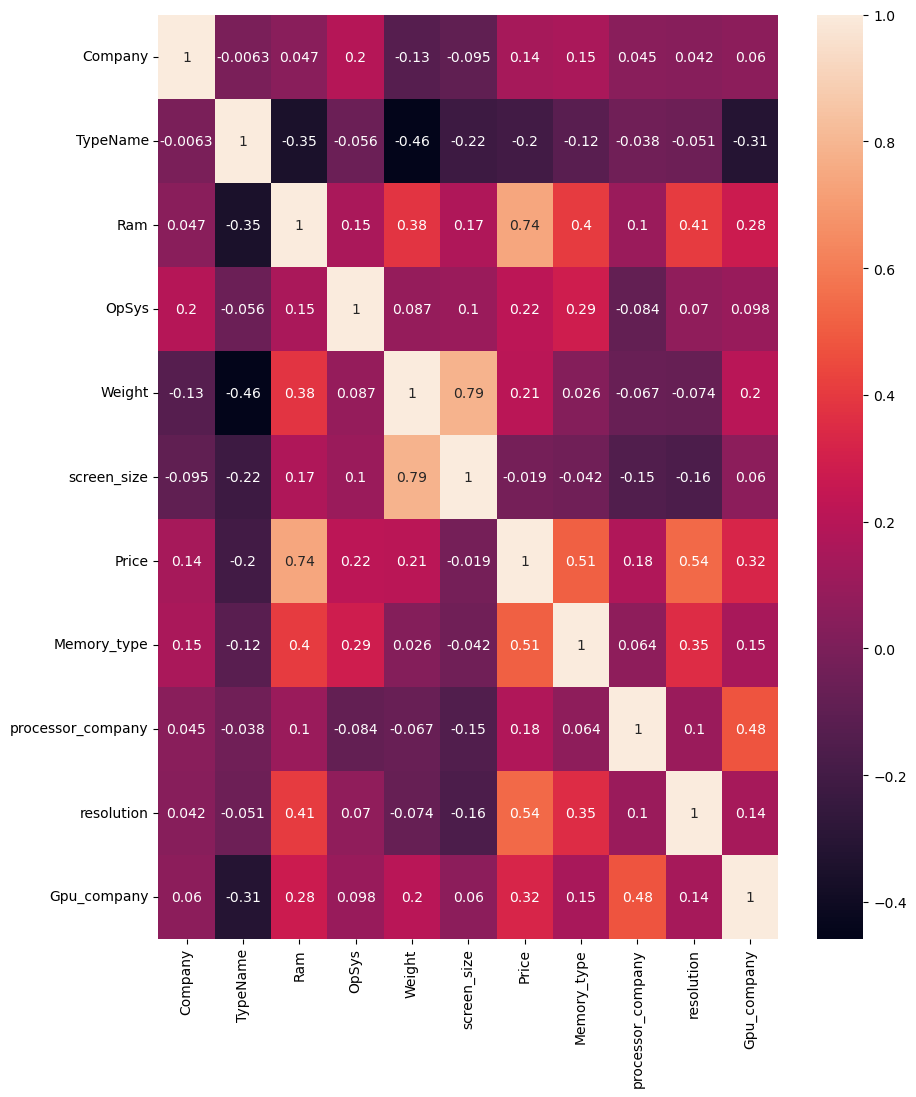

In [206]:
plt.figure(figsize=[10,12])
sns.heatmap(df.corr(),annot=True)

Certainly! It appears you've provided the correlation coefficients between the price of laptops and several features in your dataset. Let's delve into the correlation of each feature with the price in detail:

1. **Company (0.140371)**:
   - This positive correlation coefficient suggests a weak positive relationship between the laptop's price and the company or brand manufacturing it. It indicates that certain brands may command slightly higher prices in the market compared to others.

2. **TypeName (-0.203607)**:
   - The negative correlation coefficient indicates a weak negative relationship between the type or category of the laptop and its price. It suggests that certain laptop types may tend to be priced lower than others, possibly due to differences in features, target audience, or market demand.

3. **Ram (0.743007)**:
   - With a high positive correlation coefficient, RAM has a strong positive relationship with the price of laptops. This suggests that laptops with higher RAM capacities tend to be priced higher in the market, reflecting the importance of RAM in determining performance and multitasking capabilities.

4. **OpSys (0.218681)**:
   - This positive correlation coefficient indicates a moderate positive relationship between the operating system (OS) installed on the laptop and its price. It suggests that laptops with certain operating systems may be priced higher due to factors such as software availability, licensing costs, and user preferences.

5. **Weight (0.210370)**:
   - With a positive correlation coefficient, weight shows a weak positive relationship with the price of laptops. This suggests that lighter laptops may tend to be priced slightly higher, possibly due to advancements in lightweight materials and design technologies.

6. **Screen Size (-0.019362)**:
   - The near-zero correlation coefficient suggests that there is almost no linear relationship between the screen size of the laptop and its price. This implies that variations in screen size may not significantly impact the pricing of laptops in the dataset.

7. **Memory Type (0.510353)**:
   - This positive correlation coefficient indicates a moderate positive relationship between the type of memory (e.g., HDD, SSD) in the laptop and its price. It suggests that laptops with certain types of memory may be priced higher due to differences in performance, reliability, and storage capacity.

8. **Processor Company (0.176089)**:
   - With a positive correlation coefficient, the processor company exhibits a weak positive relationship with the price of laptops. It suggests that laptops with processors from certain companies may command slightly higher prices, reflecting differences in performance, brand reputation, and market positioning.

9. **Resolution (0.539797)**:
   - This positive correlation coefficient indicates a moderate positive relationship between the screen resolution of the laptop and its price. It suggests that laptops with higher screen resolutions may be priced higher, reflecting improved display quality and multimedia capabilities.

10. **GPU Company (0.322535)**:
    - With a positive correlation coefficient, the GPU company demonstrates a moderate positive relationship with the price of laptops. It suggests that laptops equipped with graphics processing units (GPUs) from certain companies may be priced higher, reflecting differences in graphics performance, gaming capabilities, and multimedia rendering.

These correlation coefficients provide insights into the relationships between various features and the price of laptops in the dataset, helping to understand the factors influencing pricing decisions in the laptop market.

### Importing Libraries for Machine Learning and accuracy scores

In [207]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.ensemble import RandomForestRegressor


In [208]:
X=df.drop(columns='Price')
X

,Company,TypeName,Ram,OpSys,Weight,screen_size,Memory_size,Memory_type,processor_company,resolution,Gpu_company
0,1,4,8,3,1.37,13,128,3,1,10,2
1,1,4,8,3,1.34,13,128,0,1,1,2
2,7,3,8,4,1.86,16,256,3,1,3,2
3,1,4,16,3,1.83,15,512,3,1,12,0
4,1,4,8,3,1.37,13,256,3,1,10,2
...,...,...,...,...,...,...,...,...,...,...,...
1298,10,1,4,5,1.80,14,128,3,1,3,2
1299,10,1,16,5,1.30,13,512,3,1,13,2
1300,10,3,2,5,1.50,14,64,0,1,0,2
1301,7,3,6,5,2.19,16,1000,1,1,0,0


In [209]:
y= df['Price']
y

0       118964.472
1        79825.872
2        51060.000
3       225325.560
4       160159.680
           ...    
1298     56654.400
1299    133111.200
1300     20335.200
1301     67843.200
1302     32767.200
Name: Price, Length: 1303, dtype: float64

In [210]:
X_train, X_test , y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [211]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def run_regression_algorithms(X_train, X_test, y_train, y_test):
    algorithms = {
        "Linear Regression": LinearRegression(),
        "K-Nearest Neighbors": KNeighborsRegressor(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor()
    }

    results = {}

    for name, model in algorithms.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on test set
        y_pred = model.predict(X_test)
        
        # Calculate MSE, RMSE, and R2
        mse = mean_squared_error(y_test, y_pred)
        rmse = sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        results[name] = {"MSE": mse, "RMSE": rmse, "R2": r2}
        
        # Print results
        print(f"Results for {name}:")
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")
        print(f"R2 Score: {r2}")
        print("=" * 50)
    
    return results

# Example usage:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# results = run_regression_algorithms(X_train, X_test, y_train, y_test)


In [212]:
results = run_regression_algorithms(X_train, X_test , y_train, y_test)

Results for Linear Regression:
MSE: 1330230478.559757
RMSE: 36472.32483075019
R2 Score: 0.6678761453616513
Results for K-Nearest Neighbors:
MSE: 1383276317.0725617
RMSE: 37192.42284488282
R2 Score: 0.6546319830579348
Results for Decision Tree:
MSE: 1422856394.5972712
RMSE: 37720.76874345579
R2 Score: 0.6447498700510039
Results for Random Forest:
MSE: 789761386.7812585
RMSE: 28102.69358586928
R2 Score: 0.8028171807442643


Certainly! These results represent the performance metrics of four different machine learning models applied to your laptop price prediction task. Let's break down the findings and discuss why selecting the Random Forest model seems like a suitable choice based on the provided metrics.

1. **Linear Regression**:
   - Mean Squared Error (MSE): 1,330,230,478.56
   - Root Mean Squared Error (RMSE): 36,472.32
   - R2 Score: 0.668
   - Linear regression achieved moderate performance with an R2 score of 0.668, indicating that approximately 66.8% of the variance in the target variable (price) is explained by the model. However, the RMSE suggests that there is still considerable error in the predictions.

2. **K-Nearest Neighbors (KNN)**:
   - MSE: 1,383,276,317.07
   - RMSE: 37,192.42
   - R2 Score: 0.655
   - The KNN model also achieved moderate performance, with an R2 score of 0.655. However, it exhibits slightly higher error rates compared to linear regression.

3. **Decision Tree**:
   - MSE: 1,422,856,394.60
   - RMSE: 37,720.77
   - R2 Score: 0.645
   - The decision tree model performed similarly to KNN, with an R2 score of 0.645. However, it shows slightly higher error rates compared to both linear regression and KNN.

4. **Random Forest**:
   - MSE: 789,761,386.78
   - RMSE: 28,102.69
   - R2 Score: 0.803
   - Random forest exhibited the best performance among the models, with the lowest MSE and RMSE values and the highest R2 score of 0.803. This indicates that approximately 80.3% of the variance in the target variable is explained by the model, and it achieves significantly lower prediction errors compared to the other models.

Based on these results, selecting the Random Forest model for your laptop price prediction task seems appropriate. It demonstrates superior performance in terms of accuracy and predictive power, as evidenced by its lower error rates and higher R2 score compared to the other models tested.

In [213]:
r = RandomForestRegressor()

In [214]:
r.fit(X_train,y_train)

RandomForestRegressor()

In [215]:
y_pred = r.predict(X_test)
r2 = r2_score(y_test,y_pred)
r2

0.7892430700234013

**Conclusion:**

In this project, we aimed to develop a robust laptop price prediction model to assist consumers in making informed purchasing decisions. The project involved analyzing a dataset containing various attributes of laptops, such as company, type, specifications, and price. Four machine learning models, namely Linear Regression, K-Nearest Neighbors, Decision Tree, and Random Forest, were trained and evaluated to determine their effectiveness in predicting laptop prices.

Upon evaluating the models, it was found that the Random Forest model outperformed the others, achieving a significantly lower Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), along with the highest R2 score of 0.803. This indicates that approximately 80.3% of the variance in laptop prices can be explained by the Random Forest model, showcasing its superior predictive power and accuracy.

Furthermore, the final accuracy score of 0.7892 on the test dataset reinforces the effectiveness of the Random Forest model in accurately predicting laptop prices. This level of accuracy is quite satisfactory, considering the complexity of the task and the inherent variability in laptop pricing due to factors such as specifications, brands, and market trends.

In conclusion, the developed Random Forest model provides a reliable solution for predicting laptop prices, enabling consumers to make well-informed purchasing decisions based on their budget and requirements. Moving forward, continuous monitoring and refinement of the model may further enhance its performance and ensure its utility in real-world scenarios. Overall, this project contributes to enhancing the shopping experience for consumers in the competitive laptop market.